In [5]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


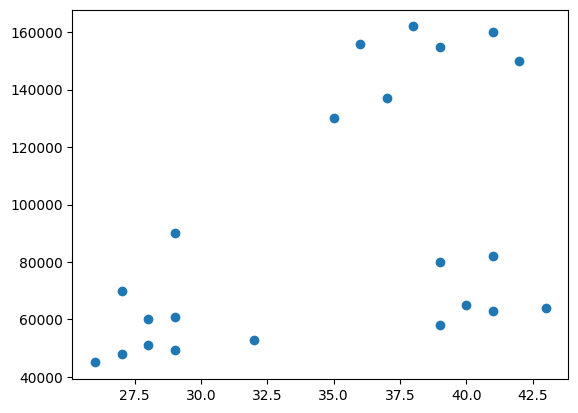

In [8]:
plt.scatter(df['Age'],df["Income($)"])

In [9]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted=km.fit_predict(df[[ 'Age','Income($)']])
y_predicted

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [11]:
df['cluster']=y_predicted 
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


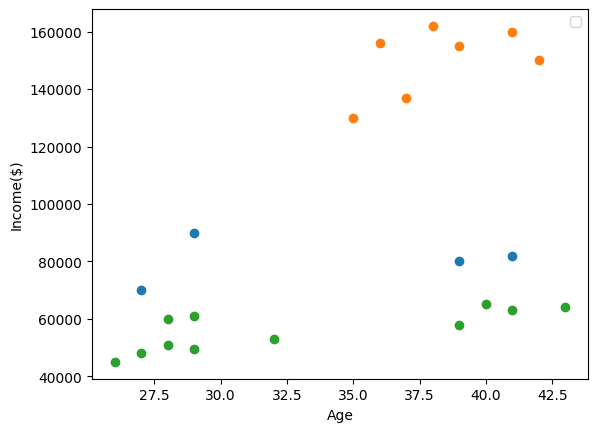

In [13]:
df1 = df[df.cluster == 0]
df2=df[df.cluster ==1]
df3= df[df.cluster ==2]
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])
plt.scatter(df3.Age,df3['Income($)'])
plt.xlabel('Age')
plt.ylabel("Income($)")

 in this graph wwe have that the blue cluster is wrong cluster that because the scale of age and income not compatible soo we need to scale up 

In [20]:
scaler=MinMaxScaler()
scaler.fit( df[['Income($)']])
df["Income($)"]=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [24]:
km= KMeans(n_clusters=3)


In [26]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [29]:
df[('cluster')]=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [31]:
km.cluster_centers_
# show as the centers in each iteration 

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

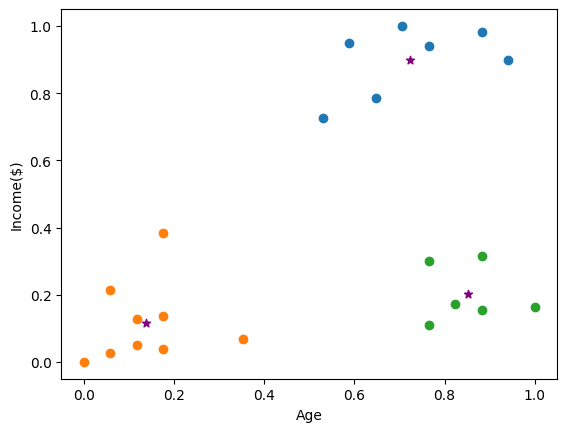

In [32]:
df1 = df[df.cluster == 0]
df2=df[df.cluster ==1]
df3= df[df.cluster ==2]
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])
plt.scatter(df3.Age,df3['Income($)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple", marker='*')
plt.xlabel('Age')
plt.ylabel("Income($)")

In [38]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

In [39]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22037641690770665,
 0.16858512236029757,
 0.13976844995388155,
 0.10497488680620906]

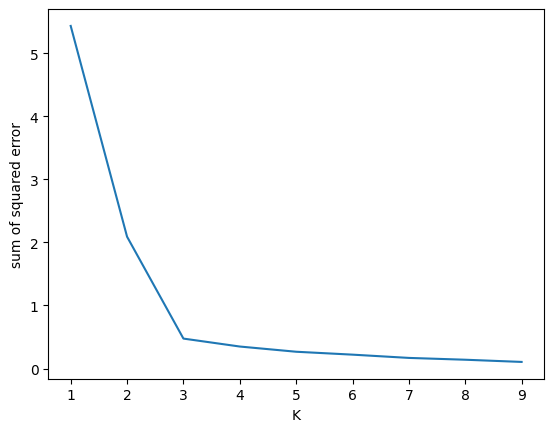

In [40]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

Exercise

In [55]:
from sklearn.datasets import load_iris
iris=load_iris()


In [56]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [57]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
dff=df.drop(["sepal length (cm)","sepal width (cm)"],axis='columns')
dff.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


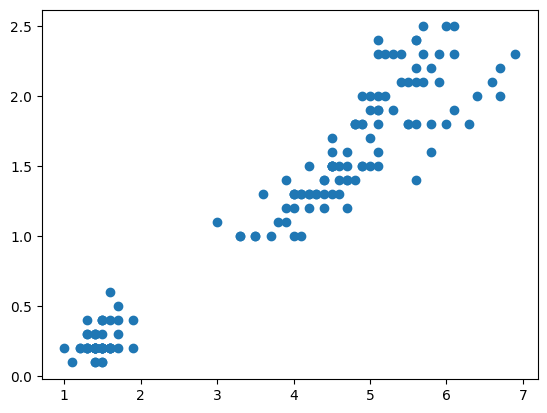

In [62]:
plt.scatter(dff['petal length (cm)'],dff['petal width (cm)'])


In [80]:
scaler=MinMaxScaler()
scaler.fit( dff[['petal length (cm)']])
dff["petal length (cm)"]=scaler.transform(dff[['petal length (cm)']])
scaler.fit(dff[['petal width (cm)']])
dff['petal width (cm)']=scaler.transform(dff[['petal width (cm)']])

In [81]:
dff

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [83]:
km=KMeans(n_clusters=3)

In [84]:
y_predicted=km.fit_predict(dff[['petal length (cm)','petal width (cm)']])
y_predicted

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
dff[('cluster')]=y_predicted
dff

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


Text(0, 0.5, 'petal width (cm)')

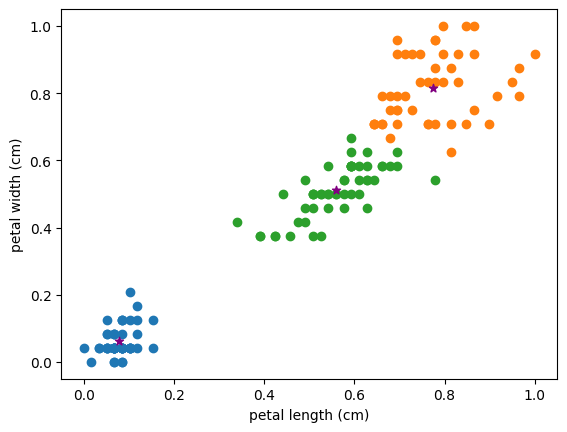

In [87]:
df1 = dff[dff.cluster == 0]
df2=dff[dff.cluster ==1]
df3= dff[dff.cluster ==2]
plt.scatter(df1["petal length (cm)"],df1['petal width (cm)'])
plt.scatter(df2["petal length (cm)"],df2['petal width (cm)'])
plt.scatter(df3["petal length (cm)"],df3['petal width (cm)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple", marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel("petal width (cm)")

In [94]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse
    

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 13.983213141025642,
 11.03633387775173,
 9.21530102264885,
 7.615402244955953,
 6.480259206692712]

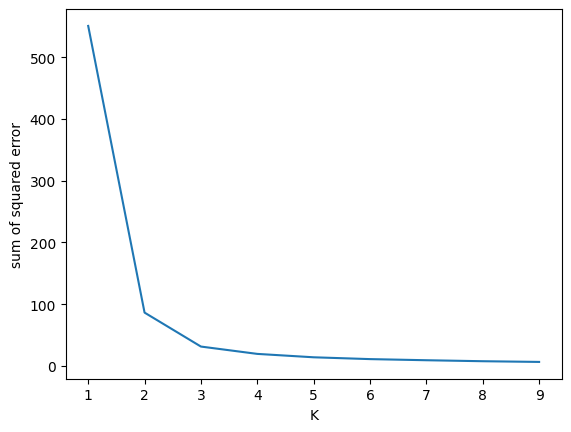

In [95]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)